In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-absstab-regions)

Euler and Backward Euler time-stepping methods were used to solve $\mathbf{u}'=\mathbf{D}_{xx}\mathbf{u}$.

In [2]:
m = 40
Dxx = FNC.diffper(m, [0, 1])[2]

The eigenvalues of this matrix are real and negative:

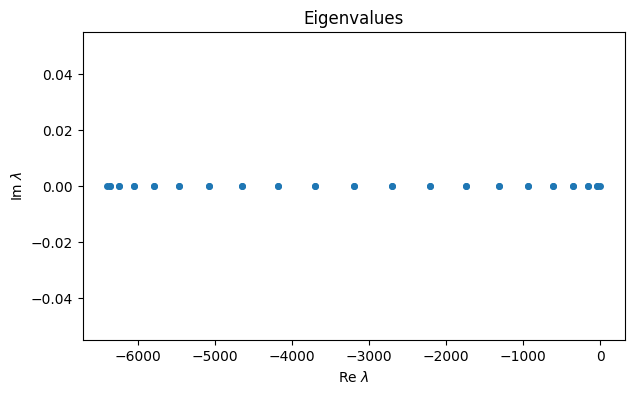

In [3]:
from scipy.linalg import eigvals
lamb = eigvals(Dxx)
plot(real(lamb), imag(lamb), "o")
xlabel("Re $\\lambda$")
ylabel("Im $\\lambda$")
title("Eigenvalues");

The Euler method is absolutely stable in the region $|\zeta+1| \le 1$ in the complex plane:

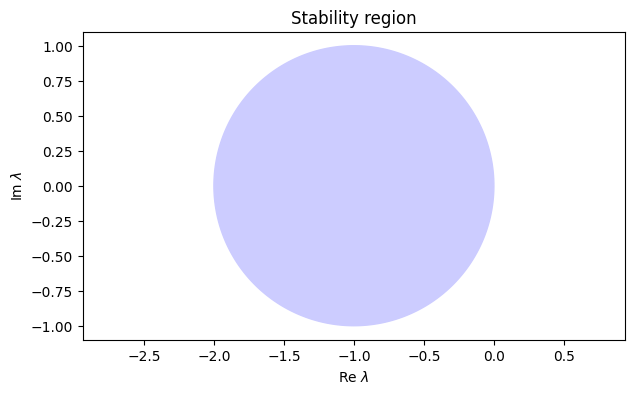

In [4]:
phi = 2 * pi * arange(361) / 360
z = exp(1j * phi) - 1  # unit circle shifted to the left by 1

fill(real(z), imag(z), color=(0.8, 0.8, 1))
xlabel("Re $\\lambda$")
ylabel("Im $\\lambda$")
axis("equal")
title("Stability region");

In order to get inside this region, we have to find $\tau$ such that $\lambda \tau > -2$ for all eigenvalues $\lambda$. This is an upper bound on $\tau$.

In [5]:
lambda_min = min(real(lamb))
max_tau = -2 / lambda_min
print(f"predicted max time step is {max_tau:.3e}")

predicted max time step is 3.125e-04


Here we plot the resulting values of $\zeta=\lambda \tau$.

<>:7: SyntaxWarning: invalid escape sequence '\z'
<>:7: SyntaxWarning: invalid escape sequence '\z'
/var/folders/gc/0752xrm56pnf0r0dsrn5370c0000gr/T/ipykernel_88435/2266119891.py:7: SyntaxWarning: invalid escape sequence '\z'
  title("Stability region and $\zeta$ values");


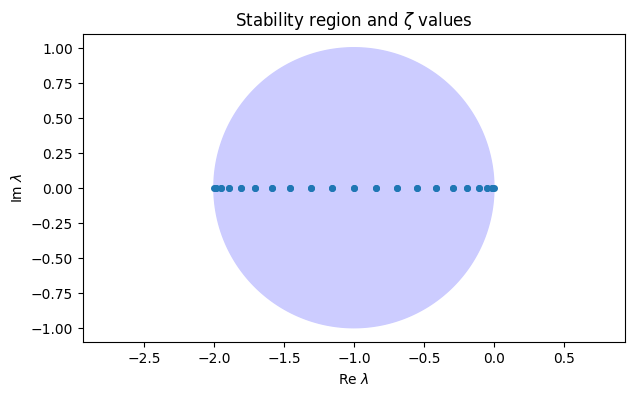

In [6]:
zeta = lamb * max_tau
fill(real(z), imag(z), color=(0.8, 0.8, 1))
plot(real(zeta), imag(zeta), "o")
xlabel("Re $\\lambda$")
ylabel("Im $\\lambda$")
axis("equal")
title("Stability region and $\zeta$ values");

In backward Euler, the region is $|\zeta-1|\ge 1$. Because they are all on the negative real axis, all of the $\zeta$ values will fit no matter what $\tau$ is chosen.

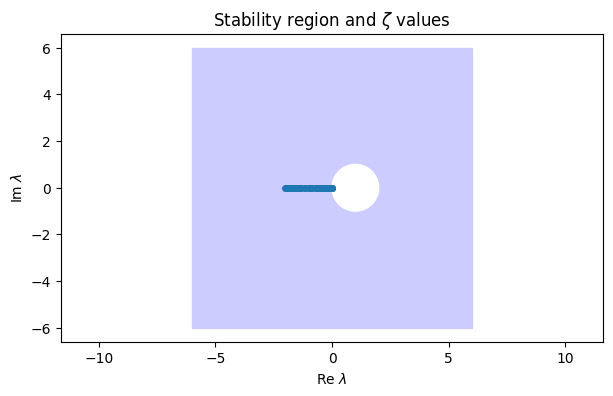

In [7]:
fill([-6, 6, 6, -6], [-6, -6, 6, 6], color=(0.8, 0.8, 1))
z = exp(1j * phi) + 1
# unit circle shifted right by 1
fill(real(z), imag(z), color="w")

plot(real(zeta), imag(zeta), "o")
axis([-4, 2, -3, 3])
axis("equal")
xlabel("Re $\\lambda$")
ylabel("Im $\\lambda$")
title("Stability region and $\\zeta$ values");